# **Weather Prediction - Time Series Forecasting Models**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
import warnings
warnings.filterwarnings('ignore')

In [3]:
weather = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v3/weather.csv')
weather['date'] = pd.to_datetime(weather['date'])
weather.head()

,date,location_key,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,2020-01-01,AD,4.236111,0.138889,8.208333,3.302000,NaN,-0.972222,72.773049
1,2020-01-02,AD,3.875000,-0.722222,10.055556,6.688667,NaN,-1.625000,70.841314
2,2020-01-03,AD,4.763889,0.597222,8.402778,5.016500,NaN,-0.611111,71.117248
3,2020-01-04,AD,4.555556,1.125000,8.708333,3.810000,NaN,0.722222,77.338640
4,2020-01-05,AD,4.763889,-1.000000,11.361111,2.476500,NaN,-3.361111,60.762380


In [4]:
list(weather['location_key'].unique())[0:50]

['AD',
 'AE',
 'AF',
 'AF_BAL',
 'AF_BAM',
 'AF_BDG',
 'AF_BDS',
 'AF_BGL',
 'AF_DAY',
 'AF_FRA',
 'AF_FYB',
 'AF_GHA',
 'AF_GHO',
 'AF_HEL',
 'AF_HER',
 'AF_JOW',
 'AF_KAB',
 'AF_KAN',
 'AF_KAP',
 'AF_KDZ',
 'AF_KHO',
 'AF_KNR',
 'AF_LAG',
 'AF_LOG',
 'AF_NAN',
 'AF_NIM',
 'AF_NUR',
 'AF_PAN',
 'AF_PAR',
 'AF_PIA',
 'AF_PKA',
 'AF_SAM',
 'AF_SAR',
 'AF_TAK',
 'AF_URU',
 'AF_WAR',
 'AF_ZAB',
 'AG',
 'AI',
 'AL',
 'AM',
 'AO',
 'AQ',
 'AR',
 'AR_A',
 'AR_A_007',
 'AR_A_014',
 'AR_A_021',
 'AR_A_028',
 'AR_A_035']

In [5]:
weather = weather[weather['location_key']=='AD']
weather.shape

(929, 9)

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         929 non-null    datetime64[ns]
 1   location_key                 929 non-null    object        
 2   average_temperature_celsius  929 non-null    float64       
 3   minimum_temperature_celsius  929 non-null    float64       
 4   maximum_temperature_celsius  929 non-null    float64       
 5   rainfall_mm                  929 non-null    float64       
 6   snowfall_mm                  78 non-null     float64       
 7   dew_point                    929 non-null    float64       
 8   relative_humidity            929 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 72.6+ KB


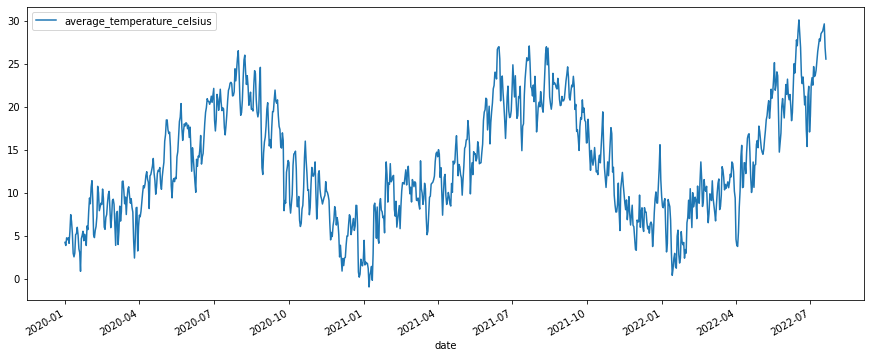

In [7]:
weather_df = weather[['date', 'average_temperature_celsius']]
weather_df.plot(x = 'date', y = 'average_temperature_celsius', figsize= (15,6));

In [8]:
# Augmented Dickey Fuller test (ADF Test) 
from statsmodels.tsa.stattools import adfuller
data = weather['average_temperature_celsius']
result = adfuller(data, autolag='AIC')
print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])
print(f'n_lags: {result[1]}')

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - So Time Series is Non-Stationary")

ADF Statistic: -1.996040
p-value: 0.288312
n_lags: 0.28831225761242074
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568
Failed to Reject Ho - So Time Series is Non-Stationary


In [9]:
weather_df = weather[weather['location_key']=='AD']
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['date'] = weather_df.date.dt.to_period('D')
weather_df = weather.groupby('date').mean().squeeze()
weather_df = weather_df['average_temperature_celsius']
weather_df

date
2020-01-01     4.236111
2020-01-02     3.875000
2020-01-03     4.763889
2020-01-04     4.555556
2020-01-05     4.763889
                ...    
2022-07-16    28.753968
2022-07-17    29.214286
2022-07-18    29.619048
2022-07-19    26.841270
2022-07-20    25.531746
Name: average_temperature_celsius, Length: 929, dtype: float64

In [12]:
weather_df = weather[weather['location_key']=='AD']
weather_df['date'] = pd.to_datetime(weather_df['date'])
#weather_df['date'] = weather_df.date.dt.to_period('D')

weather_df = weather.groupby('date').mean().squeeze()
weather_df = weather_df['average_temperature_celsius']
weather_df.index = weather_df.index.to_period("D")
weather_df

date
2020-01-01     4.236111
2020-01-02     3.875000
2020-01-03     4.763889
2020-01-04     4.555556
2020-01-05     4.763889
                ...    
2022-07-16    28.753968
2022-07-17    29.214286
2022-07-18    29.619048
2022-07-19    26.841270
2022-07-20    25.531746
Freq: D, Name: average_temperature_celsius, Length: 929, dtype: float64

In [15]:
weather_df = weather[weather['location_key']=='AD']
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df = weather.groupby('date').mean().squeeze()
weather_df = weather_df['average_temperature_celsius']
weather_df.index = weather_df.index.to_period("D") 
# Index should be datetimeindex or periodindex 
#(A for Annual, Q for Quarterly, M for monthly frequency, W for Week, D for daily frequency, H for Houly)
y = weather_df.copy()


from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
#Multiple Seasonalities can be captured using additional terms. Fourier components can be used to alternatively capture seasonal patterns.
fourier = CalendarFourier(freq="A", order=4)  # 4 sin/cos pairs for "A"nnual seasonality


#First a determinstic process with a constant and quadratic time trend.
dp = DeterministicProcess(
    index= y.index,
    constant=True,
    order=2,#Polynomial degree 2.  2 will include both linear and quadratic terms. 0 exclude time trend terms.
    # YOUR CODE HERE
    seasonal=True,               # Daily seasonality (indicators). Seasonal dummies are included by setting seasonal to True.
    additional_terms=[fourier],  # Annual seasonality (fourier). to alternatively capture seasonal patterns 
    #drop=True,
)
X = dp.in_sample()  # Produce deterministic trends for in-sample fitting

# Now fit the seasonal model.
# With our feature set created, we're ready to fit the model and make predictions. 
# We'll add a 16-day forecast to see how our model extrapolates beyond the training data. 
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
X_fore = dp.out_of_sample(steps=18) #Produce deterministic trends for out-of-sample forecasts
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)


In [16]:
X.head(2)

,const,trend,trend_squared,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=A-DEC)","cos(1,freq=A-DEC)","sin(2,freq=A-DEC)","cos(2,freq=A-DEC)","sin(3,freq=A-DEC)","cos(3,freq=A-DEC)","sin(4,freq=A-DEC)","cos(4,freq=A-DEC)"
date,,,,,,,,,,,,,,,,,
2020-01-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
2020-01-02,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.017166,0.999853,0.034328,0.999411,0.051479,0.998674,0.068615,0.997643


### **Seasonal model: Weekly Frequency**

In [18]:
weather_df = weather[weather['location_key']=='AD']
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df = weather.groupby('date').mean().squeeze()
weather_df = weather_df['average_temperature_celsius']
weather_df.index = weather_df.index.to_period("W") # Index should be datetimeindex or periodindex (M for monthly frequency, D for daily frequency)
y = weather_df.copy()

#A determinstic process with a constant and quadratic time trend.
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
#Multiple Seasonalities can be captured using additional terms. Fourier components can be used to alternatively capture seasonal patterns.
fourier = CalendarFourier(freq="A", order=4)  # 4 sin/cos pairs for "A"nnual seasonality



dp = DeterministicProcess(
    index= y.index,
    constant=True,
    order=2,#Polynomial degree 2.  2 will include both linear and quadratic terms. 0 exclude time trend terms.
    # YOUR CODE HERE
    seasonal=True,               # Weekly seasonality (indicators). Seasonal dummies are included by setting seasonal to True.
    additional_terms=[fourier],  # Annual seasonality (fourier). to alternatively capture seasonal patterns 
    #drop=True,
)
X = dp.in_sample()  # Produce deterministic trends for in-sample fitting

# Now fit the seasonal model.
# With our feature set created, we're ready to fit the model and make predictions. 
# We'll add a 18-week forecast to see how our model extrapolates beyond the training data. 
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
X_fore = dp.out_of_sample(steps=18) #Produce deterministic trends for out-of-sample forecasts
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)


In [19]:
X.head(2)

,const,trend,trend_squared,"s(2,52)","s(3,52)","s(4,52)","s(5,52)","s(6,52)","s(7,52)","s(8,52)",...,"s(51,52)","s(52,52)","sin(1,freq=A-DEC)","cos(1,freq=A-DEC)","sin(2,freq=A-DEC)","cos(2,freq=A-DEC)","sin(3,freq=A-DEC)","cos(3,freq=A-DEC)","sin(4,freq=A-DEC)","cos(4,freq=A-DEC)"
date,,,,,,,,,,,,,,,,,,,,,
2019-12-30/2020-01-05,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.034422,0.999407,-0.068802,0.99763,-0.103102,0.994671,-0.137279,0.990532
2019-12-30/2020-01-05,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.034422,0.999407,-0.068802,0.99763,-0.103102,0.994671,-0.137279,0.990532


### **Seasonal model: Monthly Frequency**

In [20]:
weather_df = weather[weather['location_key']=='AD']
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df = weather.groupby('date').mean().squeeze()
weather_df = weather_df['average_temperature_celsius']
weather_df.index = weather_df.index.to_period("M") # Index should be datetimeindex or periodindex (M for monthly frequency, D for daily frequency)
y = weather_df.copy()

#A determinstic process with a constant and quadratic time trend.
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
#Multiple Seasonalities can be captured using additional terms. Fourier components can be used to alternatively capture seasonal patterns.
fourier = CalendarFourier(freq="A", order=4)  # 4 sin/cos pairs for "A"nnual seasonality



dp = DeterministicProcess(
    index= y.index,
    constant=True,
    order=2,#Polynomial degree 2.  2 will include both linear and quadratic terms. 0 exclude time trend terms.
    # YOUR CODE HERE
    seasonal=True,               # Monthly seasonality (indicators). Seasonal dummies are included by setting seasonal to True.
    additional_terms=[fourier],  # Annual seasonality (fourier). to alternatively capture seasonal patterns 
    #drop=True,
)
X = dp.in_sample()  # Produce deterministic trends for in-sample fitting

# Now fit the seasonal model.
# With our feature set created, we're ready to fit the model and make predictions. 
# We'll add a 16-month forecast to see how our model extrapolates beyond the training data. 
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
X_fore = dp.out_of_sample(steps=18) #Produce deterministic trends for out-of-sample forecasts
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)


In [21]:
X.head(2)

,const,trend,trend_squared,"s(2,12)","s(3,12)","s(4,12)","s(5,12)","s(6,12)","s(7,12)","s(8,12)",...,"s(11,12)","s(12,12)","sin(1,freq=A-DEC)","cos(1,freq=A-DEC)","sin(2,freq=A-DEC)","cos(2,freq=A-DEC)","sin(3,freq=A-DEC)","cos(3,freq=A-DEC)","sin(4,freq=A-DEC)","cos(4,freq=A-DEC)"
date,,,,,,,,,,,,,,,,,,,,,
2020-01,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2020-01,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


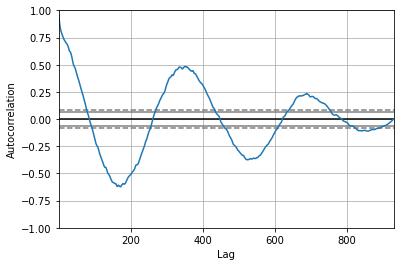

In [22]:
from pandas.plotting import autocorrelation_plot
data = weather['average_temperature_celsius']
autocorrelation_plot(data)
plt.show();

In [23]:
from statsmodels.tsa.ar_model import AutoReg
data = weather['average_temperature_celsius']
model = AutoReg(data, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(weather), len(data))
print(yhat, data)

929    25.09295
dtype: float64 0       4.236111
1       3.875000
2       4.763889
3       4.555556
4       4.763889
         ...    
924    28.753968
925    29.214286
926    29.619048
927    26.841270
928    25.531746
Name: average_temperature_celsius, Length: 929, dtype: float64


                                 AutoReg Model Results                                 
Dep. Variable:     average_temperature_celsius   No. Observations:                  929
Model:                              AutoReg(1)   Log Likelihood               -1872.997
Method:                        Conditional MLE   S.D. of innovations              1.821
Date:                         Sun, 24 Jul 2022   AIC                           3751.994
Time:                                 10:15:04   BIC                           3766.493
Sample:                                      1   HQIC                          3757.525
                                           929                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.5333      0.135      3.938      0.000       0.268       0.799

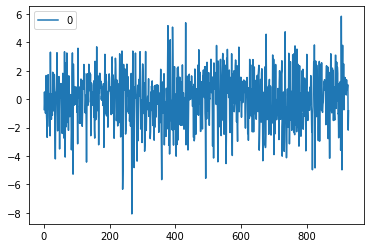

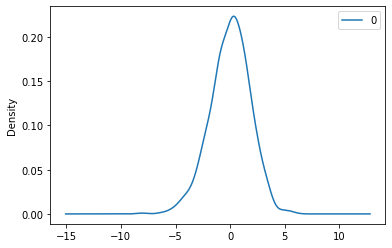

                  0
count  9.280000e+02
mean   2.450147e-16
std    1.821966e+00
min   -8.087593e+00
25%   -1.078449e+00
50%    1.145317e-01
75%    1.233182e+00
max    5.837743e+00


In [24]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat, data)

929    19.432603
dtype: float64 0       4.236111
1       3.875000
2       4.763889
3       4.555556
4       4.763889
         ...    
924    28.753968
925    29.214286
926    29.619048
927    26.841270
928    25.531746
Name: average_temperature_celsius, Length: 929, dtype: float64


                                    SARIMAX Results                                    
Dep. Variable:     average_temperature_celsius   No. Observations:                  929
Model:                          ARIMA(0, 0, 1)   Log Likelihood               -2571.624
Date:                         Sun, 24 Jul 2022   AIC                           5149.249
Time:                                 10:15:05   BIC                           5163.751
Sample:                                      0   HQIC                          5154.780
                                         - 929                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4188      0.238     56.353      0.000      12.952      13.886
ma.L1          0.8615      0.019     46.115      0.000     

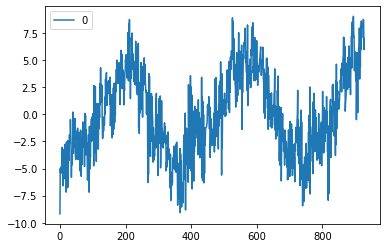

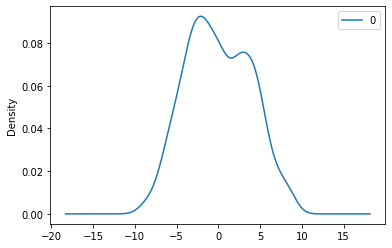

                0
count  929.000000
mean    -0.001426
std      3.861284
min     -9.182735
25%     -2.913777
50%     -0.207835
75%      3.009047
max      9.033313


In [26]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [27]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat, data)

929    25.126371
dtype: float64 0       4.236111
1       3.875000
2       4.763889
3       4.555556
4       4.763889
         ...    
924    28.753968
925    29.214286
926    29.619048
927    26.841270
928    25.531746
Name: average_temperature_celsius, Length: 929, dtype: float64


                                    SARIMAX Results                                    
Dep. Variable:     average_temperature_celsius   No. Observations:                  929
Model:                          ARIMA(2, 0, 1)   Log Likelihood               -1867.503
Date:                         Sun, 24 Jul 2022   AIC                           3745.007
Time:                                 10:15:06   BIC                           3769.177
Sample:                                      0   HQIC                          3754.226
                                         - 929                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4880      1.464      9.215      0.000      10.619      16.357
ar.L1          0.4388      0.150      2.926      0.003     

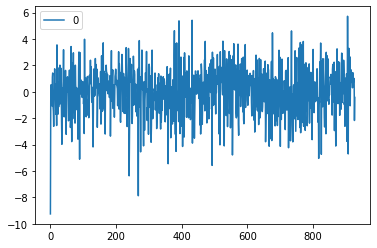

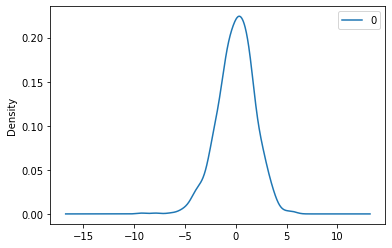

                0
count  929.000000
mean     0.008014
std      1.828251
min     -9.251877
25%     -1.072780
50%      0.117178
75%      1.221528
max      5.721507


In [28]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [29]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat, data)

929    25.609294
dtype: float64 0       4.236111
1       3.875000
2       4.763889
3       4.555556
4       4.763889
         ...    
924    28.753968
925    29.214286
926    29.619048
927    26.841270
928    25.531746
Name: average_temperature_celsius, Length: 929, dtype: float64


In [30]:
#split into train and test sets
X = data.values
size = int(len(X) * 0.70)
size1 = int(len(X) * 0.98)
train, val, test = X[0:size], X[size:size1], X[size1:len(X)]
train.shape, val.shape, test.shape

((650,), (260,), (19,))

Test RMSE: 1.907


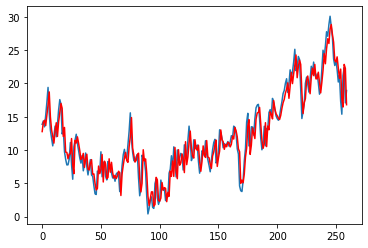

In [31]:
# split into train and test sets
X = data.values
size = int(len(X) * 0.70)
size1 = int(len(X) * 0.98)
train, val, test = X[0:size], X[size:size1], X[size1:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(val)):
    model = ARIMA(history, order=(18,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = val[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(val, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(val)
plt.plot(predictions, color='red')
plt.show()

In [33]:
yforecast = model_fit.forecast(19)
forecasted = pd.DataFrame(data[size1:len(data)])
forecasted['yforecast'] = yforecast
forecasted

,average_temperature_celsius,yforecast
910,22.523810,16.797885
911,23.365079,18.408320
912,22.500000,18.960441
913,24.658730,19.123170
914,23.500000,19.917800
915,23.682540,20.285426
916,24.230159,20.127937
917,25.365079,20.171892
918,26.420635,20.119069
919,27.150794,20.087575


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  909
Model:                ARIMA(18, 1, 0)   Log Likelihood               -1801.896
Date:                Sun, 24 Jul 2022   AIC                           3641.793
Time:                        10:21:01   BIC                           3733.207
Sample:                             0   HQIC                          3676.699
                                - 909                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0123      0.032      0.382      0.702      -0.051       0.076
ar.L2         -0.2523      0.033     -7.616      0.000      -0.317      -0.187
ar.L3         -0.1196      0.035     -3.424      0.0

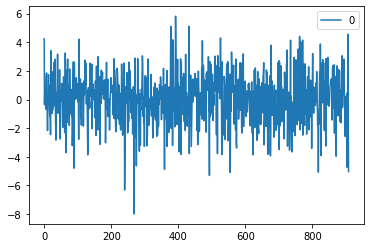

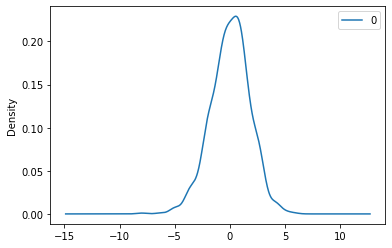

                0
count  909.000000
mean     0.044405
std      1.765070
min     -7.984391
25%     -1.027533
50%      0.107474
75%      1.156364
max      5.814488


In [34]:
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [35]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat, data)

929    25.609294
dtype: float64 0       4.236111
1       3.875000
2       4.763889
3       4.555556
4       4.763889
         ...    
924    28.753968
925    29.214286
926    29.619048
927    26.841270
928    25.531746
Name: average_temperature_celsius, Length: 929, dtype: float64


In [36]:
data2 = weather['relative_humidity']
data2.mean(), data2.shape, data.shape

(71.1417117825619, (929,), (929,))

In [37]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
data2 = weather['relative_humidity']
# fit model
model = SARIMAX(data, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)
# make prediction
from random import random
exog2 = [data2.mean() + random()]
yhat = model_fit.predict(len(data), len(data), exog = exog2)
print(yhat, data, data2)

929    24.1073
dtype: float64 0       4.236111
1       3.875000
2       4.763889
3       4.555556
4       4.763889
         ...    
924    28.753968
925    29.214286
926    29.619048
927    26.841270
928    25.531746
Name: average_temperature_celsius, Length: 929, dtype: float64 0      72.773049
1      70.841314
2      71.117248
3      77.338640
4      60.762380
         ...    
924    38.765001
925    37.041634
926    43.104576
927    66.085903
928    54.365823
Name: relative_humidity, Length: 929, dtype: float64


In [39]:
# SES 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat, data)

929    25.531746
dtype: float64 0       4.236111
1       3.875000
2       4.763889
3       4.555556
4       4.763889
         ...    
924    28.753968
925    29.214286
926    29.619048
927    26.841270
928    25.531746
Name: average_temperature_celsius, Length: 929, dtype: float64


In [40]:
# HWES 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat, data)

929    25.531746
dtype: float64 0       4.236111
1       3.875000
2       4.763889
3       4.555556
4       4.763889
         ...    
924    28.753968
925    29.214286
926    29.619048
927    26.841270
928    25.531746
Name: average_temperature_celsius, Length: 929, dtype: float64
